# BIOEN 455 Lab 2 Winter 2025: Fluid Dynamics in Microfluidic Devices
## By Sam Koplik and Ayo Olanrewaju (Jan 2025)

### Objective:
Understand the principles of flow resistance, capillary pressure, and volume in microfluidic devices. Analyze the behavior of simple microchannels using this Python script and compare the experimental measurements of drain time to the theoretical ones determined computationally.

### Instructions
- Part 1 (hands-on experiments), should be done first, as there is some waiting time involved.
- Complete code anywhere with a "TODO:" marked. Be sure to save your work frequently!
- Parts 2-7 should be done in order and can be completed after lab.

### Submission Guidelines
- Put your name and date in the next cell 
- When finished, download and submit your modified script on Canvas as pdf (File> Save and Export Notebook As > PDF)
- <font color="red">Answer reflection questions (in red).</font> This can be completed after lab. You can type this in a markdown within this script. You may optionally take videos or pictures your the chip to include in your reflection.

## Name:
## Date:

# Part 1: Measuring drain time for microchannels of different dimensions

### Overview:
You will measure and record the "drain time" of liquids in microfluidic channels with different dimensions. For this assignment, the drain time is defined as the time it takes for the liquid to reach the outlet from the moment it begins entering the inlet. While this is technically the fill time, it is commonly referred to as "drain time" in microfluidic experiments. In Parts 2-7, you will calculate the theoretical drain times and compare them with the experimental results, exploring how microchannel dimensions and liquid properties affect flow behavior in microfluidic systems.

Each chip has 6 channels, consisting of 3 different types with 2 replicates of each. You will conduct experiments using a pre-mixed dye solution containing a surfactant.

Not to worry if some channels fail; you will not be graded on your success rate. This is also part of the reason we've provided you with two replicates of each type. If any channels fail, you can reflect on why they did so (ie. print defects, bubbles, etc.). If all your channels fail, you can obtain data from a neighbor to complete your analysis. 

### Channel Dimensions

Here, we have provided the dimensions (in a table) and CAD screen shot for the channels on the microfluidic chips. Note that these rectangular channels are confingured to serpentine so they can all fit on a chip. You will measure and record drain time for each channel, and compare the measured values to the theoretical ones later on in the lab. We also have provided you space in this table to record drain times.  We recommend also writing these measurements down outside of this notebook to avoid any saving issues and loss of data.

<div style="text-align: center;">
  <img src="images/cad_lab2.png" width="300" />
</div>

| Channel # | Length (mm) | Width (µm) | Height (µm) | Time Rep1 (s) | Time Rep2 (s) | Notes                       |
|-----------|-------------|------------|-------------|---------------|---------------|-----------------------------|
| Channel 1 | 100         | 300        | 300         |               |               |                             |
| Channel 2 | 300         | 300        | 300         |               |               |                             |
| Channel 3 | 300         | 300        | 100         |               |               |                             |




### Materials
- Resin printed microfluidic chip(s) sealed with hydrophobic cover tape (ARseal 90697, Adhesives Research, Glen Rock, Pennsylvania, USA)
- Pre-mixed dye solution ( 2% food dye (Amaranth) in 1× PBS buffer containing 0.05% Tween 20). 
    - Plasma activation, though common, requires a plasma chamber and offers temporary hydrophilicity of the hydrophobic chips. Instead, we reduced the dye solution surface tension with surfactant (Tween 20) as done in Shafique H, et al. Lab Chip, 2024.
- P200 Micropipettes and tips
- Kim-wipes and paper
- Gloves
- Timer or stopwatch

## Procedure (read fully before starting)

1. **Glove Up:** Wear gloves as part of standard lab safety and best practices. All the materials we’re working with, are not really hazardous. That said, it’s still best practice to wear gloves during handling—especially since we have no idea where these pipettes have been! 😊
2. **QC:**
   - Double-check that all channels are properly sealed with cover tapes and dye solution is mixed before starting.
   - Work in your petri dish and avoid tipping the chip (the dye will spill and will stain whatever it touches)
   - You need to ensure there are no bubbles in the cover tape that could bridge two columns in a serpentine, otherwise the solution may travel through the bubble, not the channel.
   - To resolve any bubbles you notice, push them out using a flexible hard edge (such as a husky card).
<div style="text-align: center;">
    <img src="images/bubbles.png" width="1000" />
</div>

4. **Filling Channels:** Using a P200 pipette, introduce ~50µL of the pre-mixed dye solution into the inlet of one of the six channels. 
5. **Timing:** Start the timer as soon as the dye solution has started to enter the channel.  
6. **Observation:** Monitor the flow of the dye through the channel until it reaches the outlet. 
7. **Recording:** Record the time taken for each channel to fill. We suggest recording these times both in this notebook (in the table above) AND elsewhere to avoid any data loss. If your channel failed, note the modes of failure. If your dye moves, but did not make it to the end, you can approximate the length it did travel by measuring and recording both drain time and approximate length traveled. 
8. **Clean Excess Solution:** Once solution has reached the outlet, you can use paper to collect the drained volume at the outlet. Then proceed to wick up the excess dye at the inlet using a kim-wipe to avoid spilling any solution and dispose of the kim-wipe. 
9. **Repeat for Replicates:** Repeat the process for each of the 6 channels provided with ~50µL volume introduced at each inlet. Note that channel 3 will take a long time (20-30 minutes) so we suggest running both replicates at the same time, and then working on the computational part of the lab while these run).


## <font color="red">  Relfection Question 1 </font>
### <font color="red"> Which channel took the longest time to drain, and why do you think it took the longest? Which channel took the shortest time to drain, and why do you think it took the shortest? By what factor did the drain times of channels 1 and 3 change relative to channel 2, and what do you think accounts for this difference?</font>
### TODO: Answer Reflection Question 1 here

## <font color="red">  Relfection Question 2 </font>
### <font color="red">Think about why the addition of Tween was necessary for the hydrophobic chip. What do you think would have happened if it hadn't been used? Briefly research and explain the concept of wettability—how does it relate to the ability of a liquid to spread on a surface, and why is this important for fluid flow in microchannels?</font>
### TODO: Answer Reflection Question 2 here

## <font color="red">  Relfection Question 3 </font>
### <font color="red">Did any of your channels fail? If so, what do you expect is the mode of failure and how could this be avoided in the future? If none of your channels failed, feel free to skip this question, or reflect the the failure mode of other people's chips in your lab section. </font>
### TODO: Answer Reflection Question 3 here



# Part 2: Flow Resistance Calculation
Here, we provide the equation describing flow resistance in a rectangular microchannel. We have provided you the function for flow resistance (you do not need to modify this, just run the cells).

![alt text](images/resistance.png)


Figure from: Ainla, A. (2013). The Multifunctional Pipette. A Microfluidic Technology for the Biosciences.

In [3]:
#You do not need to modify this cell, just run as is

#import packages
import numpy as np

### CONSTANTS - in SI units
# Properties of liquid
#Approximation for PBST w/ 2% dye 
viscosity = 9.5e-4  #Pa
surfTension = 0.03  #N/meter

#width and height dimensions (placeholders)
w = 400e-6  #meters    
h = 400e-6 #meters 
l = 200e-3 #meters 

#contact angle measurement, in radians
#changed from that of water due to using PBST w/ dye 
#hydrophobic top PDMS surface and hydrophilic side and bottom surfaces respectively
#Approximated using Fig S12, Shafique H, et al, Lab Chip, 2024.

thetaTopWall = (np.pi * 135/180)  #contact angle of cover tape, in radians 
thetaSideWalls = (np.pi * 52.5/180) #contact angle of PBST (no plasma treatment), in radians 




In [9]:
#You do not need to modify this cell, just run as is
#FLOWRES
def flowResistance(w,h,l,viscosity):
    h_actual = min(w,h)
    w_actual= max(w,h)
    flowRes = ((12*viscosity*l)/(1-0.63*(h_actual/w_actual)))*(1/(w_actual*(h_actual**3)))
    return flowRes

## Call the flowResistance function using the default constants defined for you already. </font>

In [10]:
#TODO: call the flowResistance function using the default constants and variables, print results


## <font color="red"> Refletion Question 4 </font>
### <font color="red"> Based on the equation for rectangular flow resistance, how do you expect changes in the height and length of a microfluidic channel to impact the flow resistance? Specifically, which of these two parameters (height or length) would you expect to have a greater effect on flow resistance, and why? </font>

### TODO: Answer reflection question 4


# Part 3: Capillary Pressure Function</font>

In the figure below is the Young-Laplace Equation describing the capillary pressure of a rectangular microchannel. P is the capillary pressure, γ is the surface tension of liquid in the microchannel, and h, w, are the channel height and width respectively. θt, θb, θr, θl, are the top, bottom, right, and left channel wall contact angles, respectively. 

Given the Young-Laplace Equation describing the capillary pressure of a rectangular microchannel, write the capPressure function.  The function should take in w, h, thetaTopWall, thetaSideWalls, and surfTension and return capPressure.  **Assume thetaTopWall as equivalent to θt, and thetaSideWalls as equivalent to θb, θr, and θl.** 

<div style="text-align: center;">
    <img src="images/c8lc00458g-t1_hi-res.gif" width="600" />
</div>
<div style="text-align: center;">
    <img src="images/Screenshot_res.png" width="400" />
</div>


Adapted from Olanrewaju et al, 2018, Lab Chip,  https://doi.org/10/gk8xks and Olanrewaju et al, 2016, Lab Chip. https://doi.org/10.1039/C6LC00764C

In [6]:
# CAPPRESSURE
def capPressure(w, h, thetaTopWall, thetaSideWalls,surfTension):
    #TODO: Capillary pressure calculation for wetting liquid
    #hint use "np.cos(angle)"to call a cosine function
    #fill in function here
    return capPres

Call the capPressure function using the default constants defined for you already. </font>

In [7]:
#TODO: call the capPressure function using the default constants and variables, print results


## <font color="red"> Refletion Question 5 </font>
### <font color="red">How do fluid properties such as contact angle, viscosity, and surface tension influence fluid flow in rectangular microchannels? In your answer, explain the role of these properties in determining capillary pressure and flow resistance within microfluidic systems, and discuss their implications for microfluidic device performance.</font>

### TODO: Answer reflection question 5



# Part 4: Flow Rate Function</font>

Given that we have already defined functions for capillary pressure (P) and flow resistance (R) in a microchannel, we can now use these two values to define a flow rate (Q) function (ie. rearranging the formula below). </font>

<div style="text-align: center;">
    <img src="images/c8lc00458g-t7_hi-res.gif" width="200" />
</div>



In [10]:
def flowRate(calc_cap_pres,totalFlowRes):
    #TODO: flowRate function

    return flowrate

<font size="4">  Call the flowrate function using the results from running the capPressure function and flowResistance function with the default variables. </font>

In [11]:
#TODO: call the flowrate function using the default constants and variables, print results


# Part 5: Volume and Drain Time Functions</font>

These are pretty self explanatory. Using the resulting flow rate calculation and volume calculation, fill out the function for drain time. Note if you have a negative flow rate value, this indicates that the flow is moving in the opposite direction of the reference direction, you will need to account for this in your drainTime function (after all, time cannot be negative).

In [12]:
# VOLUME
def Volume(w,h,l):
    V = w*h*l
    return V

In [13]:
def drainTime(flowrate,vol):
    #TODO: use the volume and flow rate to write a function that returns drain time (ie. time for the volume of the channel to fill).
    return time

Call the Volume and drainTime functions ith the default variables.  </font>

In [1]:
#TODO: call the volume and drainTime functions, print results


# Part 6: Theoretical Drain Time Analysis with Varying Microchannel Dimensions</font>
In part 1, you measured and recorded drain time for each of these channels. Your task is to calculate the theoretical drain time for these channels using the functions you completed in parts 2-5. Note that the units for length are in mm  and width/height are in µm.



## Microchannel 1
- Dimensions of microfluidic channels
    - width: 300µm
    - length: 100mm
    - height: 300µm

In [4]:
#TODO: adjust dimensions:length, width and height dimensions of microchannel 1
w = 1 #meters    
h = 1 #meters 
l = 1 #meters 

#Constants for buffer in SI units
thetaTopWall = (np.pi * 135/180)  #in radians  
thetaSideWalls = (np.pi * 52.5/180)
viscosity = 9.5e-4  #Pa*s
surfTension = 0.03  #N/meterr


#TODO: Call flowResistance, capPressure, flowRate, volume, and drainTime functions after changing the dimensions to that of microchannel 1. Print results.

## Microchannel 2
- Dimensions of microfluidic channels
    - width: 300µm
    - length: 300mm
    - height: 300µm

In [16]:
#TODO: adjust dimensions:length, width and height dimensions of microchannel 2
w = 1 #meters    
h = 1 #meters 
l = 1 #meters 

#Constants for buffer in SI units
thetaTopWall = (np.pi * 135/180)  #in radians  
thetaSideWalls = (np.pi * 52.5/180)
viscosity = 9.5e-4  #Pa*s
surfTension = 0.03  #N/meterr

#TODO: Call flowResistance, capPressure, flowRate, volume, and drainTime functions after changing the dimensions to that of microchannel 2. Print results.

## Microchannel 3
- Dimensions of microfluidic channels
    - width: 300µm
    - length: 300mm
    - height: 100µm

In [17]:
#TODO: adjust dimensions:length, width and height dimensions of microchannel 3
w = 1 #meters    
h = 1 #meters 
l = 1 #meters 

#Constants for buffer in SI units
thetaTopWall = (np.pi * 135/180)  #in radians  
thetaSideWalls = (np.pi * 52.5/180)
viscosity = 9.5e-4  #Pa*s
surfTension = 0.03  #N/meterr


#TODO: Call flowResistance, capPressure, flowRate, volume, and drainTime functions after changing the dimensions to that of microchannel 3. Print results.

# Part 7: Analyze recorded vs theoretical drain times for different microchannels

In part 1 you recorded the drain times for three different rectangular microchannels and in part 6 you calculated the theoretical drain times.

Here we would like you to plot the recorded drain times versus the theoretical drain times for each microchannel. We have provided the skeleton code for necessary plotting, you are just responsible for inputting your data for the recorded and theoretical drain times. 


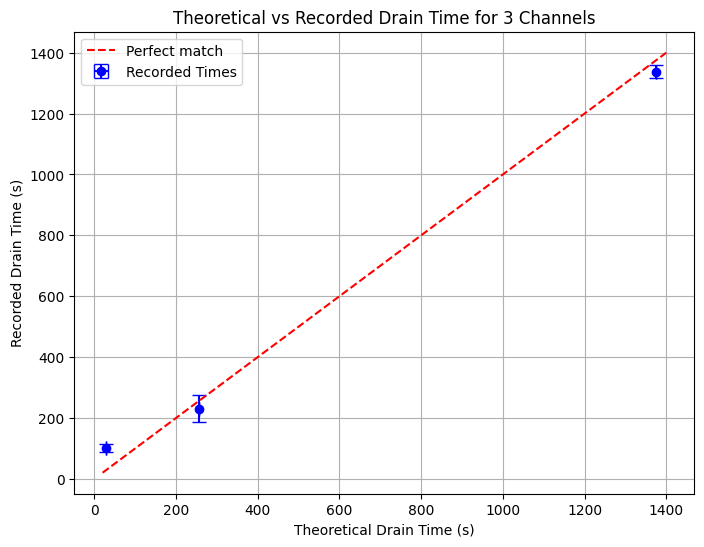

In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define your data for recorded and theoretical drain times with replicates for each of the 3 channels
# TODO: (replace example data with your actual recorded data) 
recorded_times_channel1 = np.array([113, 89])  # Replicates for Channel 1
recorded_times_channel2 = np.array([186, 275])  # Replicates for Channel 2
recorded_times_channel3 = np.array([1359, 1317])  # Replicates for Channel 3

# TODO: (replace example data with your actual theoretical data) 
theoretical_times_channel1 = 28.52  # Theoretical value for Channel 1 (no replicates)
theoretical_times_channel2 = 256  # Theoretical value for Channel 2
theoretical_times_channel3 = 1375  # Theoretical value for Channel 3

#you DO NOT need to modify the code below here
# Calculate means and standard deviations for recorded times for each channel
mean_recorded = [np.mean(recorded_times_channel1), np.mean(recorded_times_channel2), np.mean(recorded_times_channel3)]
std_dev_recorded = [np.std(recorded_times_channel1), np.std(recorded_times_channel2), np.std(recorded_times_channel3)]

# Theoretical times (single values for each channel)
theoretical_times = [theoretical_times_channel1, theoretical_times_channel2, theoretical_times_channel3]

# Plot the theoretical vs recorded drain times with error bars
plt.figure(figsize=(8,6))

# Plot for Recorded Times (with error bars)
plt.errorbar(theoretical_times, mean_recorded, xerr=0, yerr=std_dev_recorded, fmt='o', color='blue', label='Recorded Times', capsize=5)

# Add the line for perfect match
plt.plot([20, 1400], [20, 1400], color='red', linestyle='--', label='Perfect match')

# Labeling the axes and the plot
plt.xlabel('Theoretical Drain Time (s)')
plt.ylabel('Recorded Drain Time (s)')
plt.title('Theoretical vs Recorded Drain Time for 3 Channels')
plt.legend()
plt.grid(True)
plt.show()

Calculate the percentage error between the recorded and theoretical drain times for each microchannel. 
<div style="text-align: center;">
    <img src="images/percent_error.png" width="800" />
</div>

In [7]:
# TODO: Calculate the percentage error between recorded and theoretical times
#hint use np.abs for absolute value

percentage_error = 

# TODO: Print the percentage error for each microchannel


## <font color="red">Reflection Question 5</font>
### <font color="red">How did the recorded drain times compare to the theoretical values? Are the differences between the calculated and theoretical drain times consistent across the different channel sizes? If not, what factors could explain this?</font>
### TODO: Answer Reflection Question 5 here



## <font color="red">Reflection Question 6 </font>
### <font color="red">Based on the observations from the plot and error calculations, how could you minimize error in future measurements? What improvements could be made to your experimental setup to improve accuracy? Reflect on the sources of potential errors, and suggest ways to address them in future hands-on experiments </font> 
### TODO: Answer Reflection Question 6 here